# Восстановление изображений

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.signal import convolve2d as conv2

from skimage import color, data, restoration

In [2]:
def plot_triptih(images, titles=('Original', 'Distorted', 'Restored')):
    # Support method for plotting images (orignal, distorted, restored)
    n = len(images)
    m = len(titles)
    fig, ax = plt.subplots(nrows=1, ncols=n, figsize=(20, 10))
    plt.gray()
    for a in ax:
           a.axis('off')

    for i,I in enumerate(images):
        ax[i].imshow(I)
        if i<m:
            ax[i].set_title(titles[i])

    fig.subplots_adjust(wspace=0.02, hspace=0.02,
                        top=0.9, bottom=0.05, left=0, right=1)

    plt.show()

## Unsupervised wiener
box 10x10 filter

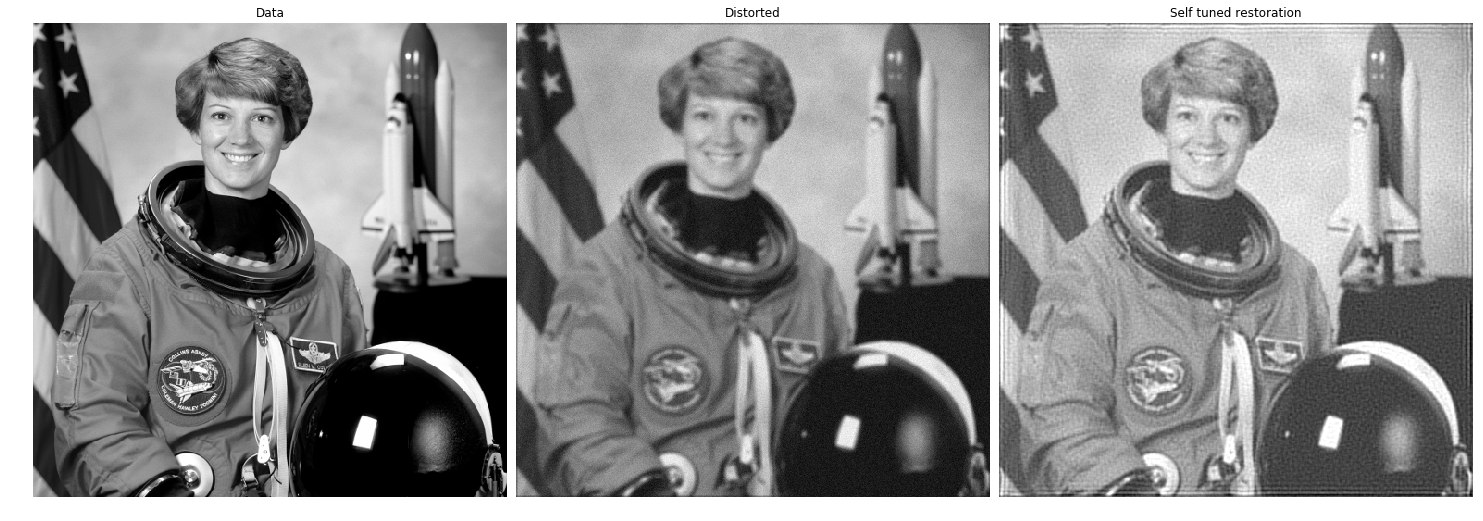

In [3]:
astro = color.rgb2gray(data.astronaut())

N = 5
psf = np.ones((N, N)) / N**2
astro_distorted = conv2(astro, psf, 'same')
astro_distorted += 0.1 * astro_distorted.std() * np.random.standard_normal(astro_distorted.shape)

deconvolved, _ = restoration.unsupervised_wiener(astro_distorted, psf)

plot_triptih((astro, astro_distorted, deconvolved),
            ('Data', 'Distorted', 'Self tuned restoration'))

In [4]:
import skimage.data
from skimage import img_as_float
img = img_as_float(skimage.data.camera())
sigma = 0.1
img = img + sigma * np.random.standard_normal(img.shape)
sigma_hat = restoration.estimate_sigma(img, multichannel=False)
sigma, sigma_hat

(0.1, 0.099771735183915217)

## Wiener
box 10x10

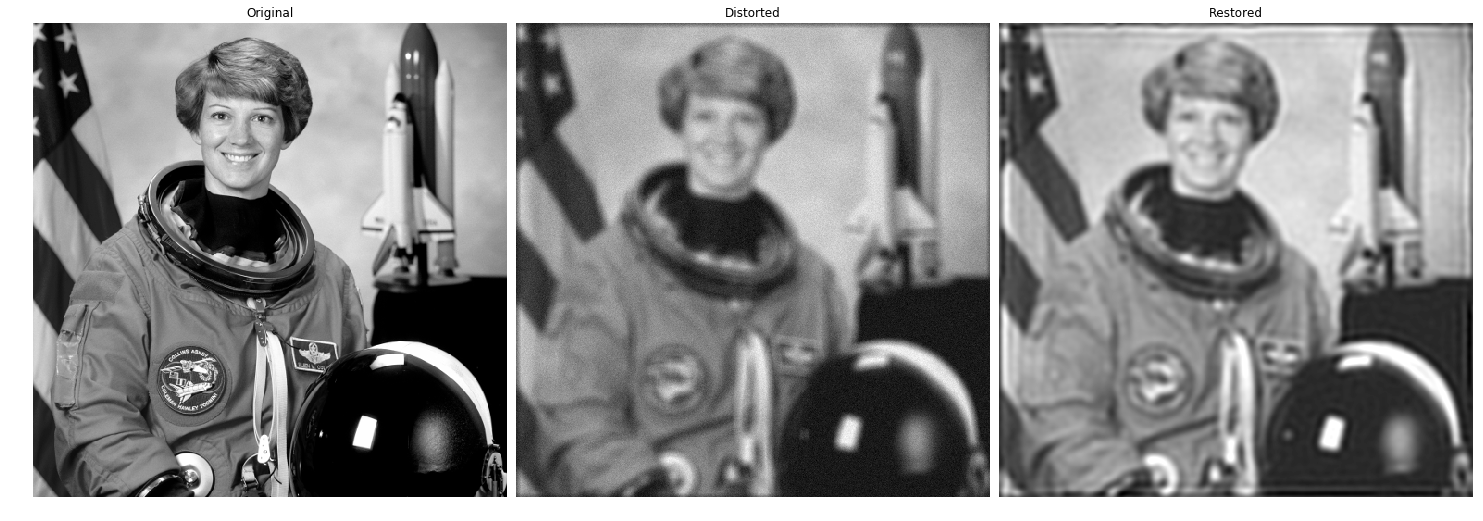

In [5]:
from skimage import color, data, restoration
astro = color.rgb2gray(data.astronaut())
from scipy.signal import convolve2d
N = 10
psf = np.ones((N, N)) / N**2
astro_distorted = convolve2d(astro, psf, 'same')
astro_distorted += 0.1 * astro_distorted.std() * np.random.standard_normal(astro_distorted.shape)
deconvolved_img = restoration.wiener(astro_distorted, psf, 1)

plot_triptih((astro, astro_distorted, deconvolved_img))

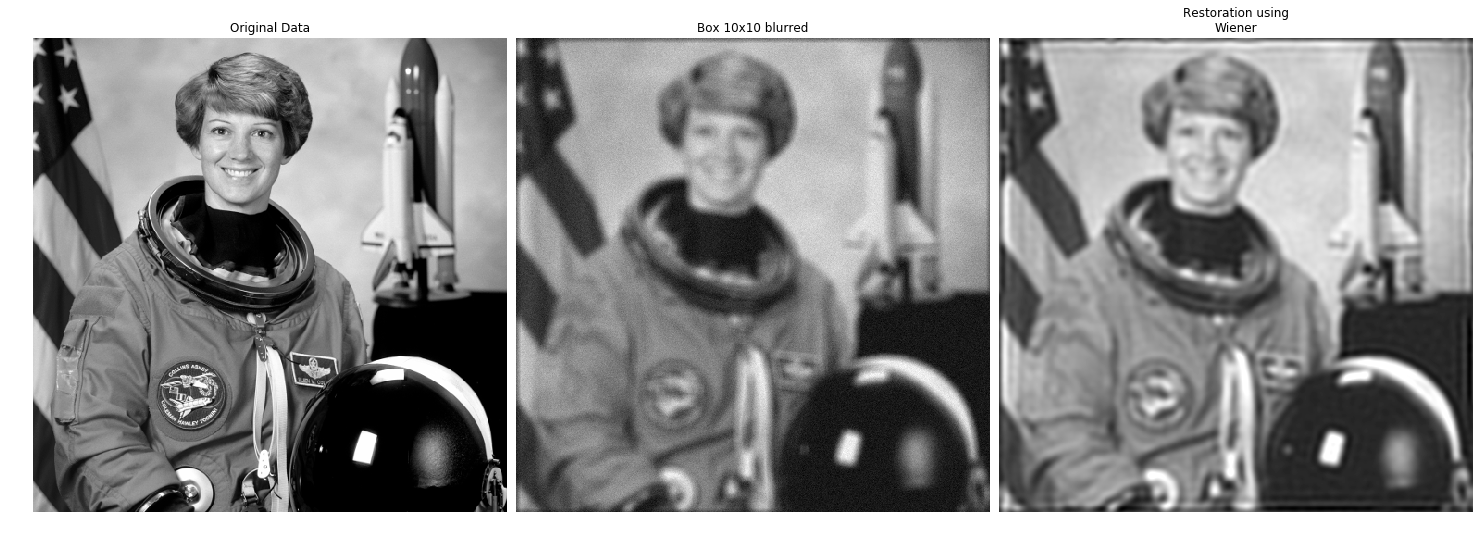

In [6]:
astro = color.rgb2gray(data.astronaut())
N = 10
psf = np.ones((N, N)) / N**2
astro_distorted = convolve2d(astro, psf, 'same')
astro_distorted += 0.1 * astro_distorted.std() * np.random.standard_normal(astro_distorted.shape)

#sigma_hat = restoration.estimate_sigma(I_noised, multichannel=False)

deconvolved_img = restoration.wiener(astro_distorted, psf, 1)

plot_triptih((astro, astro_distorted, deconvolved_img),
             ('Original Data', 'Box {0}x{0} blurred'.format(N), 'Restoration using\nWiener'))

## Lucy-Richardson
box 10x10 filter

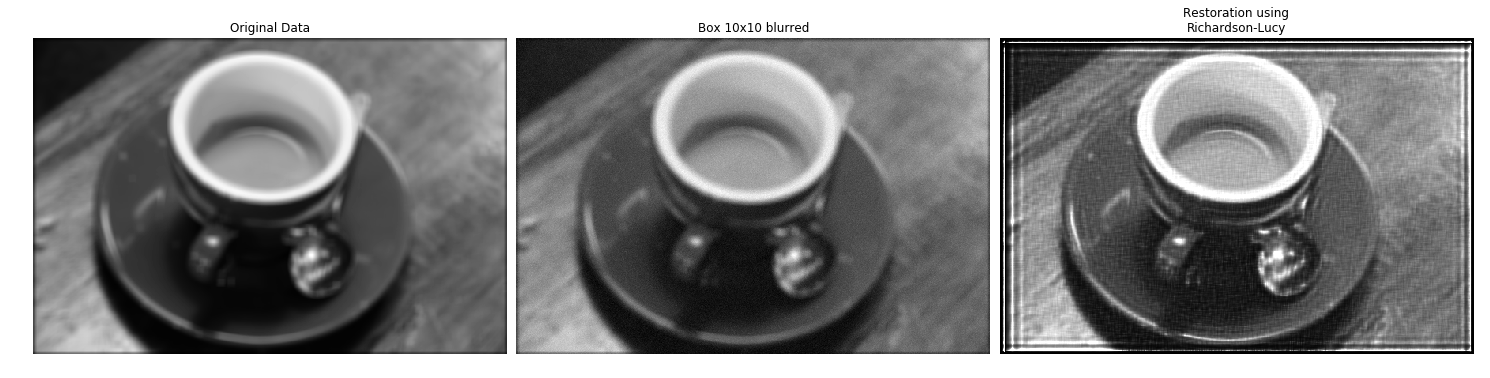

In [7]:
astro = color.rgb2gray(data.coffee())#color.rgb2gray(data.astronaut())
N = 10
psf = np.ones((N, N)) / N**2
astro = conv2(astro, psf, 'same')
# Add Noise to Image
astro_noisy = astro.copy()
astro_noisy += (np.random.poisson(lam=25, size=astro.shape) - 10) / 255.

# Restore Image using Richardson-Lucy algorithm
deconvolved_RL = restoration.richardson_lucy(astro_noisy, psf, iterations=30)

plot_triptih((astro, astro_noisy, deconvolved_RL),
             ('Original Data', 'Box {0}x{0} blurred'.format(N), 'Restoration using\nRichardson-Lucy'))

Motion blur (x+=20) filter

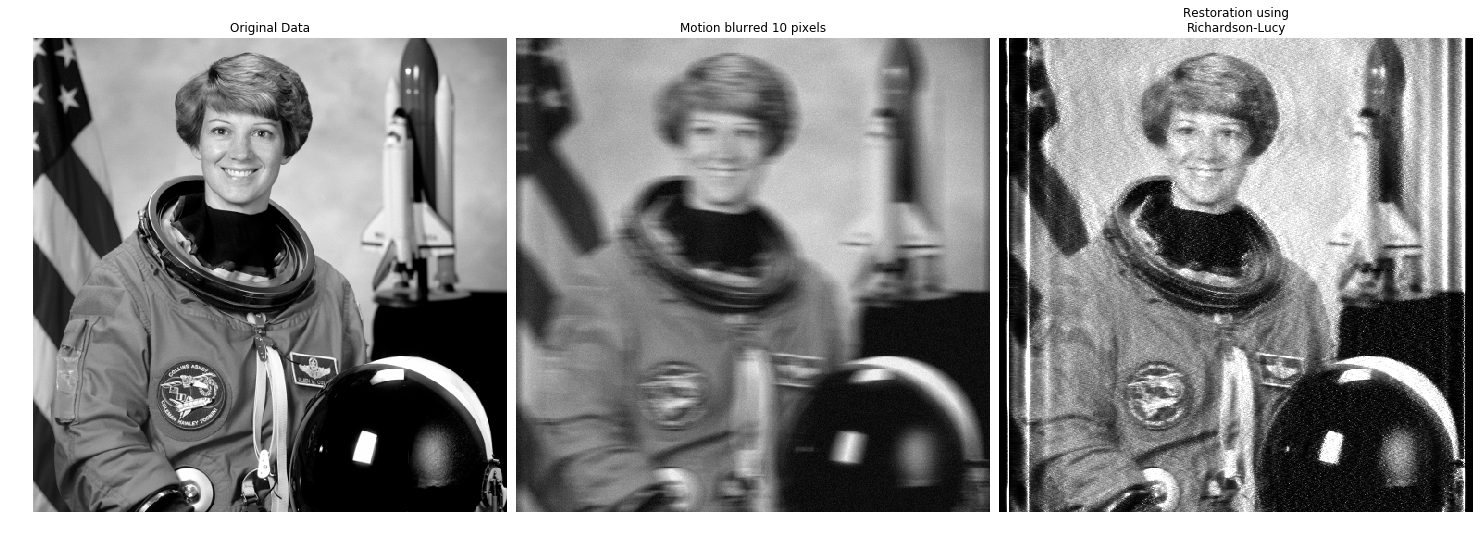

In [8]:
I = color.rgb2gray(data.astronaut())
mv = 20
psf_mv = np.ones((1,mv))/mv
I_moved = conv2(I, psf_mv, 'same')

# Add Noise to Image
I_noised = I_moved.copy()
I_noised += (np.random.poisson(lam=25, size=I_noised.shape) - 10) / 255.

#mv -=14
#psf_mv = np.ones((1,mv))/mv
deconvolved_RL = restoration.richardson_lucy(I_noised, psf_mv, iterations=50)

plot_triptih((I, I_noised, deconvolved_RL),
             ('Original Data', 'Motion blurred {0} pixels'.format(N), 'Restoration using\nRichardson-Lucy'))

In [9]:
def gauss2dKernel(sigma, size=3):
    # First a 1-D  Gaussian
    t = np.linspace(-(size-1)/2., (size-1)/2., size)
    bump = np.exp(-t**2/(2*sigma**2))
    return bump[:, np.newaxis] * bump[np.newaxis, :] / (2*np.pi*sigma**2)

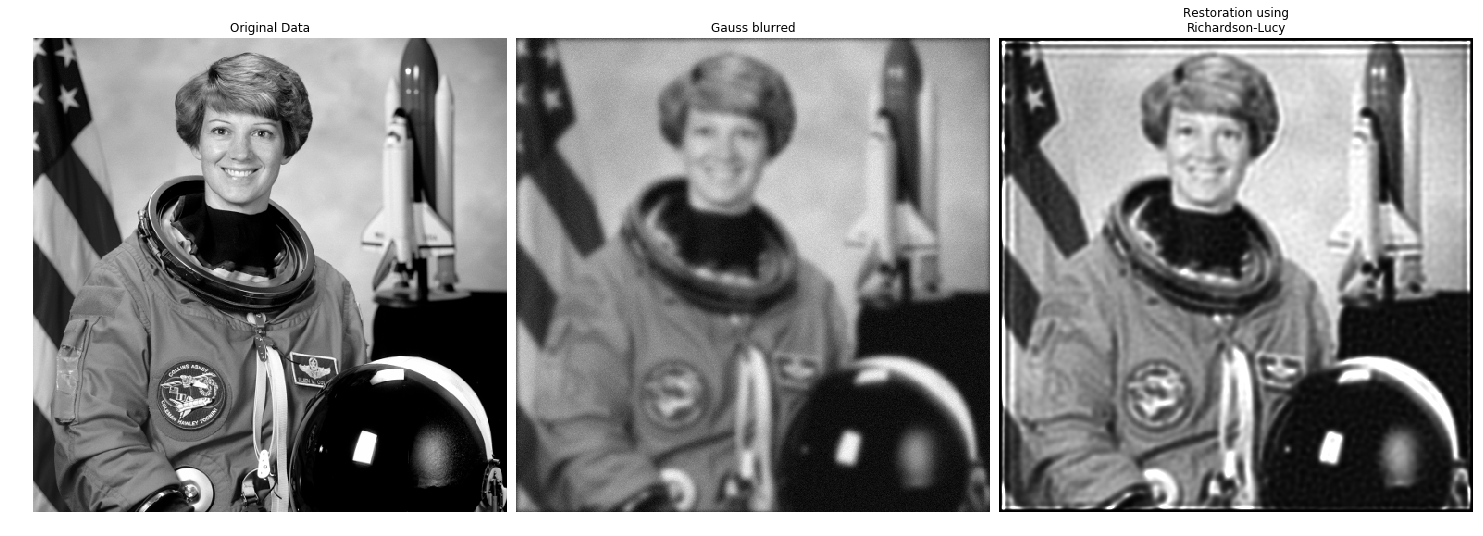

In [10]:
I = color.rgb2gray(data.astronaut())

psf_mv = gauss2dKernel(3, 20)
I_moved = conv2(I, psf_mv, 'same')

# Add Noise to Image
I_noised = I_moved.copy()
I_noised += (np.random.poisson(lam=25, size=I_noised.shape) - 10) / 255.

deconvolved_RL = restoration.richardson_lucy(I_noised, psf_mv, iterations=30)

plot_triptih((I, I_noised, deconvolved_RL),
             ('Original Data', 'Gauss blurred', 'Restoration using\nRichardson-Lucy'))